In [1]:
import math
from math import exp, sqrt, log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import scipy
import xlsxwriter

from scipy import stats
import pylab
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import sqlite3
from sqlite3 import Error
 
""" create a database connection tool to a SQLite database """
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"C:\Users\lione\OneDrive\Dokumente\GitHub\AQM\SQL_DB.db")

2.6.0


In [2]:
#Select Statement to import the SQL Data back into Python:   
conn = sqlite3.connect('SQL_DB.db')
c = conn.cursor()
c.execute("SELECT * FROM MACRO_CLEAN")
macro_sql_data=c.fetchall()
macro = pd.DataFrame(macro_sql_data,columns=['DATE', 'Macro_Variable',  'Value'])
macro = macro.set_index('DATE')
macro = macro.pivot(columns='Macro_Variable', values=['Value'])
macro = macro.droplevel(level=0, axis=1)

c.execute("SELECT * FROM FUTURES_CLEAN")
futures_sql_data=c.fetchall()
futures = pd.DataFrame(futures_sql_data,columns=['DATE', 'CLOSE', 'Instrument', 'Return'])
futures = futures.set_index('DATE')
futures = futures.pivot(columns='Instrument', values=['Return']) 
futures = futures.droplevel(level=0, axis=1)

In [3]:
macro.head(5)

Macro_Variable,CHCPIY_ECI,CHJOB_ECI,CHPMI_ECI,CNCPI_ECI,CNPMIB_ECI,EUHICY_ECI,EUUNR_ECI,RUCPIY_ECI,RUUNR_ECI,USCPI_ECI,USPMI_ECI,USUNR_ECI
DATE,,,,,,,,,,,,
2012-01-31,-0.8,2.8,48.0,4.5,50.5,2.7,10.9,4.2,6.3,0.3,54.2,8.3
2012-02-29,-0.9,2.8,48.2,3.2,51.0,2.7,11.1,3.7,6.2,0.2,53.3,8.3
2012-03-31,-1.0,2.8,50.6,3.6,53.1,2.7,11.2,3.7,6.3,0.2,53.5,8.2
2012-04-30,-1.0,2.8,46.5,3.4,53.3,2.6,11.3,3.6,5.6,0.2,55.2,8.2
2012-05-31,-1.0,2.9,45.8,3.0,50.4,2.4,11.4,3.6,5.2,-0.2,53.2,8.2


In [4]:
futures.head(5)

Instrument,CLc1,Cc1,GCc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
DATE,,,,,,,,,,,
2012-01-31,-0.003548,-0.011669,0.104223,0.015742,0.035098,-0.177449,0.217209,0.045254,0.124642,0.175813,0.020095
2012-02-29,0.083629,0.027018,-0.016185,0.022179,0.054151,0.044156,-0.097193,0.029731,0.064479,0.039819,-0.002631
2012-03-31,-0.038560,-0.019224,-0.024031,-0.058057,0.035080,-0.207404,-0.147004,-0.078729,-0.031720,-0.063076,-0.005283
2012-04-30,0.017798,0.024920,-0.003541,-0.014214,-0.060838,0.072124,-0.155215,0.042856,-0.044050,-0.047622,-0.019871
2012-05-31,-0.192230,-0.173200,-0.062513,-0.013992,-0.069586,0.058228,-0.228750,-0.107767,-0.101703,-0.109752,-0.006194


Test for Stationarity with Dickey Fuller Test / Unit Root

In [5]:
futures

Instrument,CLc1,Cc1,GCc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
DATE,,,,,,,,,,,
2012-01-31,-0.003548,-0.011669,0.104223,0.015742,0.035098,-0.177449,0.217209,0.045254,0.124642,0.175813,0.020095
2012-02-29,0.083629,0.027018,-0.016185,0.022179,0.054151,0.044156,-0.097193,0.029731,0.064479,0.039819,-0.002631
2012-03-31,-0.038560,-0.019224,-0.024031,-0.058057,0.035080,-0.207404,-0.147004,-0.078729,-0.031720,-0.063076,-0.005283
2012-04-30,0.017798,0.024920,-0.003541,-0.014214,-0.060838,0.072124,-0.155215,0.042856,-0.044050,-0.047622,-0.019871
2012-05-31,-0.192230,-0.173200,-0.062513,-0.013992,-0.069586,0.058228,-0.228750,-0.107767,-0.101703,-0.109752,-0.006194
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,-0.076555,-0.024053,0.001323,-0.025932,0.207778,0.111804,0.011963,-0.073216,-0.032029,-0.063390,0.004254
2021-09-30,0.091054,0.005137,-0.033446,0.013569,0.676408,0.292980,-0.015353,-0.260308,-0.053689,-0.084389,0.026184
2021-10-31,0.107797,0.057029,0.015658,0.054864,-0.414303,-0.078141,-0.096178,0.042952,0.059295,0.083763,0.063095


Normality Test: Jarque Bera

In [6]:
#Jarque Bera Test of the futures:
Results_futures_JB = pd.DataFrame()
for i in range (len(futures.columns)):
    JB = pd.DataFrame()
    JB['Future'] = [futures.columns[i]]
    JB['JB'] = [stats.jarque_bera(futures[futures.columns[i]])]
    Results_futures_JB = Results_futures_JB.append(JB)
Results_futures_JB.set_index('Future', inplace=True)
Results_futures_JB.to_excel('Results_futures_JB.xlsx')
Results_futures_JB

,JB
Future,
CLc1,"(913.5242485536739, 0.0)"
Cc1,"(32.23704413205092, 9.995736760526341e-08)"
GCc1,"(0.014578499597381549, 0.9927372523499332)"
LCc1,"(4.30301206649713, 0.11630886079363212)"
NGLNMc1,"(66.53296046362013, 3.552713678800501e-15)"
NGc1,"(23.68655076200156, 7.186722145058333e-06)"
OJc1,"(0.04262891207113453, 0.9789110916646923)"
PAc1,"(9.689475120302093, 0.00786968250228659)"
PLc1,"(0.6935144559941344, 0.7069769416335927)"


In [7]:
Results_macro_JB = pd.DataFrame()
for i in range (len(macro.columns)):
    JB = pd.DataFrame()
    JB['Indicator'] = [macro.columns[i]]
    JB['JB'] = [stats.jarque_bera(macro[macro.columns[i]])]
    Results_macro_JB = Results_macro_JB.append(JB)
Results_macro_JB.set_index('Indicator', inplace=True)
Results_macro_JB.to_excel('Results_macro_JB.xlsx')
Results_macro_JB

,JB
Indicator,
CHCPIY_ECI,"(3.454505438638618, 0.17777212964904443)"
CHJOB_ECI,"(14.1945504248204, 0.0008273562246873256)"
CHPMI_ECI,"(5.203242966838809, 0.07415324242636756)"
CNCPI_ECI,"(22.98710187582568, 1.0195634312148982e-05)"
CNPMIB_ECI,"(18858.864573979634, 0.0)"
EUHICY_ECI,"(29.772924436266266, 3.426822451357836e-07)"
EUUNR_ECI,"(11.906648648708076, 0.0025971922421126337)"
RUCPIY_ECI,"(62.464808650377115, 2.731148640577885e-14)"
RUUNR_ECI,"(2.8211357496109937, 0.24400467969243445)"


In [8]:
#Jarque Bera Test of the Macro:
#for i in range (len(macro.columns)):
    #print(macro.columns[i])
    #print(stats.jarque_bera(macro[macro.columns[i]]))

Correlations:

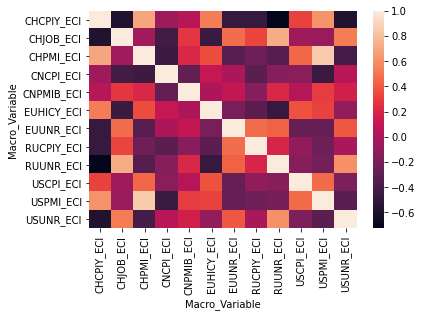

In [9]:
corr_macro = macro.corr()
corr_macro.to_excel('Results\Correlation_Matrix_macro.xlsx')

#Correlation Heatmap:
sns.heatmap(corr_macro, xticklabels=corr_macro.columns.values, yticklabels=corr_macro.columns.values);
plt.savefig('Grafiken\Correlation Heatmap macro')

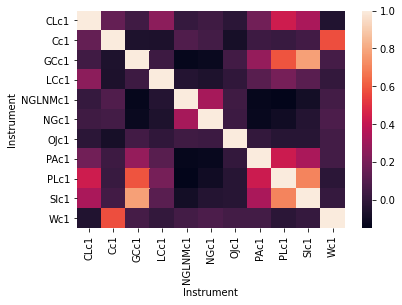

In [10]:
corr_futures = futures.corr()
corr_futures.to_excel('Results\Correlation_Matrix_futures.xlsx')

#Correlation Heatmap:
sns.heatmap(corr_futures, xticklabels=corr_futures.columns.values, yticklabels=corr_futures.columns.values);
plt.savefig('Grafiken\Correlation Heatmap futures')

Stationarity Test

In [11]:
# Stationarity Test
def ADF_test(df):
    adf_res = []
    for cols in df.columns:
        X = np.array(df[cols].values)
        result = adfuller(X)
        adf_res.append({
            'Variable': cols,
            'ADF Stat': result[0],
            'p-value': result[1]
            })
    adf_res = pd.DataFrame(adf_res)
    adf_res.index = adf_res['Variable']
    adf_res.drop(columns = "Variable", inplace = True)
    return adf_res

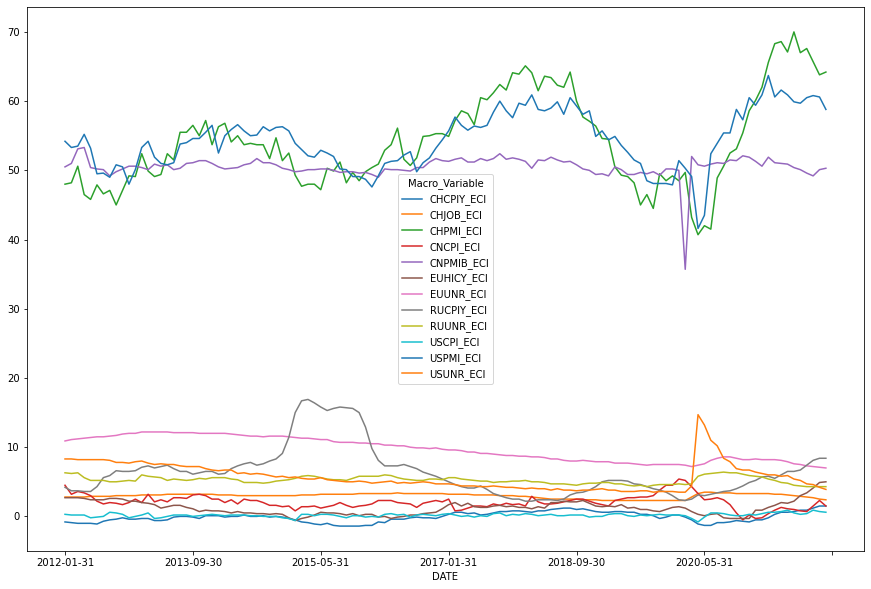

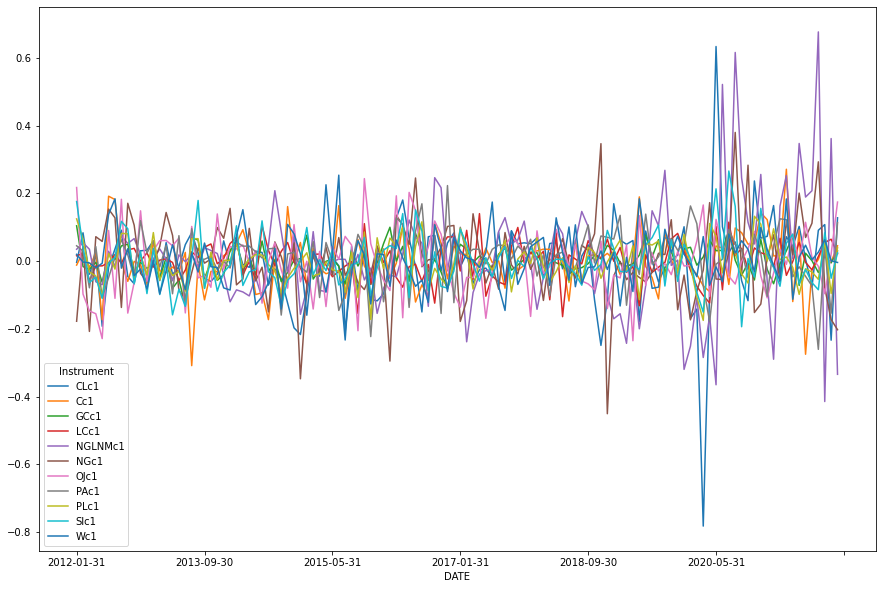

In [12]:
Results_ADF_macro = ADF_test(macro)
macro.plot(figsize=(15,10))
plt.savefig('Grafiken\Makro Line Plot ADF')
Results_ADF_macro.to_excel('Results\ADF Test macro.xlsx')

Results_ADF_future = ADF_test(futures)
futures.plot(figsize=(15,10))
plt.savefig('Grafiken\Futures Line Plot ADF')
Results_ADF_future.to_excel('Results\ADF Test futures.xlsx')

In [13]:
Results_ADF_macro

,ADF Stat,p-value
Variable,,
CHCPIY_ECI,-2.328491,1.629438e-01
CHJOB_ECI,-2.088274,2.492557e-01
CHPMI_ECI,-3.858571,2.361803e-03
CNCPI_ECI,-2.282377,1.777146e-01
CNPMIB_ECI,-6.083171,1.079944e-07
EUHICY_ECI,-1.606645,4.802547e-01
EUUNR_ECI,-0.111239,9.483075e-01
RUCPIY_ECI,-2.031981,2.727288e-01
RUUNR_ECI,-3.465134,8.929010e-03


In [14]:
Results_ADF_future

,ADF Stat,p-value
Variable,,
CLc1,-8.554770,9.021291e-14
Cc1,-7.135309,3.433303e-10
GCc1,-11.210490,2.131605e-20
LCc1,-5.987174,1.780759e-07
NGLNMc1,-2.063894,2.592786e-01
NGc1,-11.344375,1.035743e-20
OJc1,-13.488058,3.145550e-25
PAc1,-12.638666,1.451054e-23
PLc1,-12.569449,2.019238e-23


In [ ]:
#tickers_loop="WIKI/" + data_4['ticker'][0:20] + " - Open"
tickers_loop=futures
tickers_loop_list=list(tickers_loop.iloc[:].values)
var_list=tickers_loop_list

In [ ]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(futures[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(futures[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

In [ ]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in var_list:
        adf_library = adfuller(data_3[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(data_3[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

OLS

In [ ]:
#OLS
import statsmodels.api as sm
y = futures['CLc1']
x = macro[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
#ODER COV TYPE HC0?
#print(results.summary())

In [15]:
#Code for VIF Calculation - added a Return-Statement, so that the Results get added in a DataFrame:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    ttt = pd.DataFrame()
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)

        tt = pd.DataFrame()
        tt['XVAR'] = [xvar_names[i]]
        tt['VIF'] = [vif]
        ttt = ttt.append(tt)
    return ttt

In [ ]:
#VIF Calc: Code for 1 column:
input_columns = macro[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
xxx = vif_cal(input_data=input_columns, dependent_col='CHCPIY_ECI')
xxx

In [ ]:
#VIF Calc: Code for all Columns - Loop:
input_columns = macro[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
VIF_Results = pd.DataFrame()
for col in range(0, len(input_columns.columns)):
    vif = vif_cal(input_data=input_columns, dependent_col=input_columns.columns[col])
    vif = pd.DataFrame(vif)
    vif['dep_col'] = input_columns.columns[col]
    VIF_Results = VIF_Results.append(vif)
VIF_Results = VIF_Results.set_index(['dep_col']).pivot(columns='XVAR', values=['VIF'])
VIF_Results = VIF_Results.droplevel(level=0, axis=1)
VIF_Results.to_excel('VIF_Results.xlsx')
VIF_Results

In [16]:
#Loop:
for i in range(len(futures.columns)):
    print(futures.columns[i])
    for x in range(len(macro.columns)):
        print(macro.columns[x])
    print(macro.columns)

CLc1
CHCPIY_ECI
CHJOB_ECI
CHPMI_ECI
CNCPI_ECI
CNPMIB_ECI
EUHICY_ECI
EUUNR_ECI
RUCPIY_ECI
RUUNR_ECI
USCPI_ECI
USPMI_ECI
USUNR_ECI
Index(['CHCPIY_ECI', 'CHJOB_ECI', 'CHPMI_ECI', 'CNCPI_ECI', 'CNPMIB_ECI',
       'EUHICY_ECI', 'EUUNR_ECI', 'RUCPIY_ECI', 'RUUNR_ECI', 'USCPI_ECI',
       'USPMI_ECI', 'USUNR_ECI'],
      dtype='object', name='Macro_Variable')
Cc1
CHCPIY_ECI
CHJOB_ECI
CHPMI_ECI
CNCPI_ECI
CNPMIB_ECI
EUHICY_ECI
EUUNR_ECI
RUCPIY_ECI
RUUNR_ECI
USCPI_ECI
USPMI_ECI
USUNR_ECI
Index(['CHCPIY_ECI', 'CHJOB_ECI', 'CHPMI_ECI', 'CNCPI_ECI', 'CNPMIB_ECI',
       'EUHICY_ECI', 'EUUNR_ECI', 'RUCPIY_ECI', 'RUUNR_ECI', 'USCPI_ECI',
       'USPMI_ECI', 'USUNR_ECI'],
      dtype='object', name='Macro_Variable')
GCc1
CHCPIY_ECI
CHJOB_ECI
CHPMI_ECI
CNCPI_ECI
CNPMIB_ECI
EUHICY_ECI
EUUNR_ECI
RUCPIY_ECI
RUUNR_ECI
USCPI_ECI
USPMI_ECI
USUNR_ECI
Index(['CHCPIY_ECI', 'CHJOB_ECI', 'CHPMI_ECI', 'CNCPI_ECI', 'CNPMIB_ECI',
       'EUHICY_ECI', 'EUUNR_ECI', 'RUCPIY_ECI', 'RUUNR_ECI', 'USCPI_ECI',
       'USPM

In [26]:
import statsmodels.api as sm
Results_OLS = pd.DataFrame()
Top_results_OLS = pd.DataFrame()
VIF_Results = pd.DataFrame()
Breusch_Pagan = pd.DataFrame()


counter = 0
for i in range(len(futures.columns)):
    print(futures.columns[i])
    for k in range(len(macro.columns)):
        print(macro.columns[k])
        y = futures[futures.columns[i]]
        x = macro[macro.columns[k]]
        x = sm.add_constant(x)
        model = sm.OLS(y,x, missing = 'drop') 
        results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
        print(results.summary())
        counter += 1

        # Breush Pagan Test for Heteroskedastic residuals
        regression1 = pd.DataFrame(y)
        prediction = results.predict()
        regression1['Prediction'] = prediction
        residuals1 = y - prediction
        results_summary  = results.summary()
        #plt.plot(residuals1)
        #plt.title('Residuals')
        #plt.show

        #Append Results to the Results-Table:
        results_as_html = results_summary.tables[1].as_html()
        results = pd.read_html(results_as_html, header=0, index_col=0)[0]
        results['Futures'] = futures.columns[i]
        Results_OLS = Results_OLS.append(results)
        dfs = {}
        fs = results_summary
        for item in fs.tables[0].data:
            dfs[item[0].strip()] = item[1].strip()
            dfs[item[2].strip()] = item[3].strip()
        for item in fs.tables[2].data:
            dfs[item[0].strip()] = item[1].strip()
            dfs[item[2].strip()] = item[3].strip()
        dfs = pd.Series(dfs)
        dfs = pd.DataFrame(dfs)
        dfs.reset_index()
        dfs['Futures'] = futures.columns[i]
        Top_results_OLS = Top_results_OLS.append(dfs)
        Top_results_OLS

    #With all 
    print(macro.columns)
    y = futures[futures.columns[i]]
    x = macro[macro.columns]
    x = sm.add_constant(x)
    model = sm.OLS(y,x, missing = 'drop') 
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
    print(results.summary())
    counter += 1

    # Breush Pagan Test for Heteroskedastic residuals
    regression1 = pd.DataFrame(y)
    prediction = results.predict()
    regression1['Prediction'] = prediction
    residuals1 = y - prediction
    results_summary  = results.summary()

    #Append Results to the Results-Table:
    results_as_html = results_summary.tables[1].as_html()
    results = pd.read_html(results_as_html, header=0, index_col=0)[0]
    results['Futures'] = futures.columns[i]
    Results_OLS = Results_OLS.append(results)
    dfs = {}
    fs = results_summary
    for item in fs.tables[0].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    for item in fs.tables[2].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    dfs = pd.Series(dfs)
    dfs = pd.DataFrame(dfs)
    dfs.reset_index()
    dfs['Futures'] = futures.columns[i]
    Top_results_OLS = Top_results_OLS.append(dfs)
    Top_results_OLS
        
print(counter)
#Top_results_OLS = Top_results_OLS.pivot(columns='Futures', values=[0])
#Top_results_OLS = Top_results_OLS.droplevel(level=0, axis=1)
Results_OLS
Top_results_OLS

CLc1
CHCPIY_ECI
                            OLS Regression Results                            
Dep. Variable:                   CLc1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.01194
Date:                Mon, 11 Apr 2022   Prob (F-statistic):              0.913
Time:                        08:19:04   Log-Likelihood:                 74.561
No. Observations:                 120   AIC:                            -145.1
Df Residuals:                     118   BIC:                            -139.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.012    

,coef,std err,z,P>|z|,[0.025,0.975],Futures
const,-0.0024,0.012,-0.205,0.838,-0.026,0.021,CLc1
CHCPIY_ECI,-0.0020,0.019,-0.109,0.913,-0.039,0.035,CLc1
const,-0.1857,0.112,-1.657,0.097,-0.405,0.034,CLc1
CHJOB_ECI,0.0619,0.038,1.645,0.100,-0.012,0.136,CLc1
const,-0.1443,0.150,-0.962,0.336,-0.438,0.150,CLc1
...,...,...,...,...,...,...,...
RUCPIY_ECI,-0.0048,0.003,-1.643,0.100,-0.010,0.001,Wc1
RUUNR_ECI,-0.0058,0.023,-0.254,0.800,-0.050,0.039,Wc1
USCPI_ECI,0.0175,0.027,0.659,0.510,-0.035,0.070,Wc1
USPMI_ECI,-0.0010,0.003,-0.343,0.732,-0.007,0.005,Wc1


In [122]:
import statsmodels.api as sm


VIF_Results = pd.DataFrame()
Breusch_Pagan = pd.DataFrame()
Results_OLS = pd.DataFrame()
Top_results_OLS = pd.DataFrame()

counter = 0
for i in range(len(futures.columns)):
    #print(futures.columns[i])
    for k in range(len(macro.columns)):
        #print(macro.columns[k])
        y = futures[futures.columns[i]]
        x_variables = macro[macro.columns[k]]
        x = sm.add_constant(x_variables)
        model = sm.OLS(y,x, missing = 'drop') 
        results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
        #print(results.summary())
        counter += 1
        # Breush Pagan Test for Heteroskedastic residuals
        regression1 = pd.DataFrame(y)
        prediction = results.predict()
        regression1['Prediction'] = prediction
        residuals1 = y - prediction
        results_summary  = results.summary()
        #plt.plot(residuals1)
        #plt.title('Residuals')
        #plt.show

        pagan = pd.DataFrame()
        name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        pagan = sms.het_breuschpagan(residuals1, results.model.exog)
        breusch = lzip(name, pagan)
        breusch = pd.DataFrame(breusch)
        breusch['Futures'] = futures.columns[i]
        breusch['coef_var'] = macro.columns[k]
        Breusch_Pagan = Breusch_Pagan.append(breusch)
        Breusch_Pagan

        #Append Results to the Results-Table:
        results_as_html = results_summary.tables[1].as_html()
        results = pd.read_html(results_as_html, header=0, index_col=0)[0]
        results['Futures'] = futures.columns[i]
        results['coef_var'] = macro.columns[k]
        Results_OLS = Results_OLS.append(results)
        dfs = {}
        fs = results_summary
        for item in fs.tables[0].data:
            dfs[item[0].strip()] = item[1].strip()
            dfs[item[2].strip()] = item[3].strip()
        for item in fs.tables[2].data:
            dfs[item[0].strip()] = item[1].strip()
            dfs[item[2].strip()] = item[3].strip()
        dfs = pd.Series(dfs)
        dfs = pd.DataFrame(dfs)
        dfs.reset_index()
        dfs['Futures'] = futures.columns[i]
        dfs['coef_var'] = macro.columns[k]
        Top_results_OLS = Top_results_OLS.append(dfs)
        Top_results_OLS
        
        #VIF Berechnung

    #With all 
    #print(macro.columns)
    y = futures[futures.columns[i]]
    x = macro[macro.columns]
    x = sm.add_constant(x)
    model = sm.OLS(y,x, missing = 'drop') 
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
    #print(results.summary())
    counter += 1

    # Breush Pagan Test for Heteroskedastic residuals
    regression1 = pd.DataFrame(y)
    prediction = results.predict()
    regression1['Prediction'] = prediction
    residuals1 = y - prediction
    results_summary  = results.summary()

    pagan = pd.DataFrame()
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    pagan = sms.het_breuschpagan(residuals1, results.model.exog)
    breusch = lzip(name, pagan)
    breusch = pd.DataFrame(breusch)
    breusch['Futures'] = futures.columns[i]
    breusch['coef_var'] = 'All'
    Breusch_Pagan = Breusch_Pagan.append(breusch)
    Breusch_Pagan

    #Append Results to the Results-Table:
    results_as_html = results_summary.tables[1].as_html()
    results = pd.read_html(results_as_html, header=0, index_col=0)[0]
    results['Futures'] = futures.columns[i]
    results['coef_var'] = 'All'
    Results_OLS = Results_OLS.append(results)
    dfs = {}
    fs = results_summary
    for item in fs.tables[0].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    for item in fs.tables[2].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    dfs = pd.Series(dfs)
    dfs = pd.DataFrame(dfs)
    dfs.reset_index()
    dfs['Futures'] = futures.columns[i]
    dfs['coef_var'] = 'All'
    Top_results_OLS = Top_results_OLS.append(dfs)
    Top_results_OLS
        
    #VIF Berechnung

    
print(counter)
Breusch_Pagan = Breusch_Pagan.rename(columns={0:'Variable', 1:'Value'})
Breusch_Pagan = Breusch_Pagan.set_index('Variable')
Breusch_Pagan['Combo'] = Breusch_Pagan[['Futures', 'coef_var']].agg(' & '.join, axis=1)
Breusch_Pagan = Breusch_Pagan.drop(columns=['Futures', 'coef_var'])
Breusch_Pagan = Breusch_Pagan.reset_index()
Breusch_Pagan = Breusch_Pagan.set_index('Combo')
Breusch_Pagan = Breusch_Pagan.pivot(columns='Variable', values='Value')
Breusch_Pagan.to_excel('Results\OLS_Results_Breusch_Pagan.xlsx')

Results_OLS.to_excel('Results\OLS_Results_Bottom.xlsx')

Top_results_OLS['Combo'] = Top_results_OLS[['Futures', 'coef_var']].agg(' & '.join, axis=1)
Top_results_OLS = Top_results_OLS.drop(columns=['Futures', 'coef_var'])
Top_results_OLS = Top_results_OLS.reset_index()
Top_results_OLS = Top_results_OLS.set_index('Combo')
Top_results_OLS = Top_results_OLS.pivot(columns='index', values=[0])
Top_results_OLS.to_excel('Results\OLS_Results_Top.xlsx')



143


In [125]:
Breusch_Pagan

Variable,Lagrange multiplier statistic,f p-value,f-value,p-value
Combo,,,,
CLc1 & All,37.744800,0.000031,4.091629,0.000169
CLc1 & CHCPIY_ECI,1.941542,0.166224,1.940581,0.163501
CLc1 & CHJOB_ECI,0.006236,0.937713,0.006133,0.937057
CLc1 & CHPMI_ECI,6.449197,0.010842,6.701893,0.011100
CLc1 & CNCPI_ECI,3.088042,0.080076,3.116781,0.078870
...,...,...,...,...
Wc1 & RUCPIY_ECI,5.460484,0.019320,5.625457,0.019451
Wc1 & RUUNR_ECI,0.614679,0.437273,0.607547,0.433031
Wc1 & USCPI_ECI,0.003729,0.951817,0.003667,0.951309


In [123]:
Top_results_OLS

0                                             \
index                   AIC: Adj. R-squared:    BIC: Cond. No.   
Combo                                                            
CLc1 & All            -189.2           0.359  -152.9  3.85e+03   
CLc1 & CHCPIY_ECI     -145.1          -0.008  -139.5      1.40   
CLc1 & CHJOB_ECI      -148.4           0.019  -142.8      28.7   
CLc1 & CHPMI_ECI      -147.2           0.009  -141.6      454.   
CLc1 & CNCPI_ECI      -152.0           0.048  -146.5      6.23   
...               ..     ...             ...     ...       ...   
Wc1 & RUCPIY_ECI      -267.6           0.006  -262.1      15.0   
Wc1 & RUUNR_ECI       -266.0          -0.008  -260.4      54.9   
Wc1 & USCPI_ECI       -266.6          -0.003  -261.1      4.08   
Wc1 & USPMI_ECI       -266.7          -0.002  -261.2      719.   
Wc1 & USUNR_ECI       -266.1          -0.007  -260.6      19.2   

                                                                               \
index             Covariance Type:             Date: Dep. Variable: Df Model:   
Combo                                                                           
CLc1 & All                     HAC  Mon, 11 Apr 2022           CLc1        12   
CLc1 & CHCPIY_ECI              HAC  Mon, 11 Apr 2022           CLc1         1   
CLc1 & CHJOB_ECI               HAC  Mon, 11 Apr 2022           CLc1         1   
CLc1 & CHPMI_ECI               HAC  Mon, 11 Apr 2022           CLc1         1   
CLc1 & CNCPI_ECI               HAC  Mon, 11 Apr 2022           CLc1         1   
...                            ...               ...            ...       ...   
Wc1 & RUCPIY_ECI               HAC  Mon, 11 Apr 2022            Wc1         1   
Wc1 & RUUNR_ECI                HAC  Mon, 11 Apr 2022            Wc1         1   
Wc1 & USCPI_ECI                HAC  Mon, 11 Apr 2022            Wc1         1   
Wc1 & USPMI_ECI                HAC  Mon, 11 Apr 2022            Wc1         1   
Wc1 & USUNR_ECI                HAC  Mon, 11 Apr 2022            Wc1         1   

                                 ...                                          \
index             Df Residuals:  ...        Method: Model: No. Observations:   
Combo                            ...                                           
CLc1 & All                  107  ...  Least Squares    OLS               120   
CLc1 & CHCPIY_ECI           118  ...  Least Squares    OLS               120   
CLc1 & CHJOB_ECI            118  ...  Least Squares    OLS               120   
CLc1 & CHPMI_ECI            118  ...  Least Squares    OLS               120   
CLc1 & CNCPI_ECI            118  ...  Least Squares    OLS               120   
...                         ...  ...            ...    ...               ...   
Wc1 & RUCPIY_ECI            118  ...  Least Squares    OLS               120   
Wc1 & RUUNR_ECI             118  ...  Least Squares    OLS               120   
Wc1 & USCPI_ECI             118  ...  Least Squares    OLS               120   
Wc1 & USPMI_ECI             118  ...  Least Squares    OLS               120   
Wc1 & USUNR_ECI             118  ...  Least Squares    OLS               120   

                                                                          \
index             Omnibus: Prob (F-statistic):  Prob(JB): Prob(Omnibus):   
Combo                                                                      
CLc1 & All          16.969            3.96e-10   7.44e-17          0.000   
CLc1 & CHCPIY_ECI   54.648               0.913  2.05e-198          0.000   
CLc1 & CHJOB_ECI    54.872               0.103  1.07e-179          0.000   
CLc1 & CHPMI_ECI    46.545               0.315  9.08e-200          0.000   
CLc1 & CNCPI_ECI    43.097              0.0650  1.48e-155          0.000   
...                    ...                 ...        ...            ...   
Wc1 & RUCPIY_ECI     5.914               0.213     0.0624          0.052   
Wc1 & RUUNR_ECI      3.330               0.739      0.247          0.189   
W

In [124]:
Results_OLS

,coef,std err,z,P>|z|,[0.025,0.975],Futures,coef_var
const,-0.0024,0.012,-0.205,0.838,-0.026,0.021,CLc1,CHCPIY_ECI
CHCPIY_ECI,-0.0020,0.019,-0.109,0.913,-0.039,0.035,CLc1,CHCPIY_ECI
const,-0.1857,0.112,-1.657,0.097,-0.405,0.034,CLc1,CHJOB_ECI
CHJOB_ECI,0.0619,0.038,1.645,0.100,-0.012,0.136,CLc1,CHJOB_ECI
const,-0.1443,0.150,-0.962,0.336,-0.438,0.150,CLc1,CHPMI_ECI
...,...,...,...,...,...,...,...,...
RUCPIY_ECI,-0.0048,0.003,-1.643,0.100,-0.010,0.001,Wc1,All
RUUNR_ECI,-0.0058,0.023,-0.254,0.800,-0.050,0.039,Wc1,All
USCPI_ECI,0.0175,0.027,0.659,0.510,-0.035,0.070,Wc1,All
USPMI_ECI,-0.0010,0.003,-0.343,0.732,-0.007,0.005,Wc1,All


Loop:

In [ ]:
#Create Table to save all Results from OLS:
import statsmodels.api as sm
Results_OLS = pd.DataFrame()
Top_results_OLS = pd.DataFrame()
VIF_Results = pd.DataFrame()
Breusch_Pagan = pd.DataFrame()

len_comm_col = len(futures.columns) 
for col in range(0, len_comm_col):
    
    #OLS Simulation for each Commodity:
    y = futures[futures.columns[col]]
    x = macro[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
    x = sm.add_constant(x)
    model = sm.OLS(y,x, missing = 'drop') 
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
    print(results.summary())

    # Breush Pagan Test for Heteroskedastic residuals
    regression1 = pd.DataFrame(y)
    prediction = results.predict()
    regression1['Prediction'] = prediction
    residuals1 = y - prediction
    results_summary  = results.summary()
    #plt.plot(residuals1)
    #plt.title('Residuals')
    #plt.show

    pagan = pd.DataFrame()
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    pagan = sms.het_breuschpagan(residuals1, results.model.exog)
    breusch = lzip(name, pagan)
    breusch = pd.DataFrame(breusch)
    breusch['Commodity'] = futures.columns[col]
    Breusch_Pagan = Breusch_Pagan.append(breusch)
    Breusch_Pagan

    #Append Results to the Results-Table:
    results_as_html = results_summary.tables[1].as_html()
    results = pd.read_html(results_as_html, header=0, index_col=0)[0]
    results['Commodity'] = futures.columns[col]
    Results_OLS = Results_OLS.append(results)
    dfs = {}
    fs = results_summary
    for item in fs.tables[0].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    for item in fs.tables[2].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    dfs = pd.Series(dfs)
    dfs = pd.DataFrame(dfs)
    dfs.reset_index()
    dfs['Commodity'] = futures.columns[col]
    Top_results_OLS = Top_results_OLS.append(dfs)
    Top_results_OLS

Results_OLS.to_excel('OLS_Results_Bottom.xlsx')
Top_results_OLS = Top_results_OLS.pivot(columns='Commodity', values=[0])
Top_results_OLS = Top_results_OLS.droplevel(level=0, axis=1)
Top_results_OLS.to_excel('OLS_Results_Top.xlsx')
Breusch_Pagan = Breusch_Pagan.rename(columns={0:'Variable', 1:'Value'})
Breusch_Pagan = Breusch_Pagan.set_index('Variable')
Breusch_Pagan = Breusch_Pagan.pivot(columns='Commodity', values=['Value'])
Breusch_Pagan = Breusch_Pagan.droplevel(level=0, axis=1)
Breusch_Pagan.to_excel('Breusch_Pagan_Results.xlsx')




In [ ]:
Results_OLS

In [ ]:
Top_results_OLS

Diverse Code-Snippets:

In [ ]:
#Jarq Bera Test:
stats.jarque_bera(ReturnS)

#LjungBox autocorrelation:
PF_Ljung = sm.stats.acorr_ljungbox(PF_Returns, lags=10)

#Autocorrelation als Grafik:
data = np.array(PF_Returns)
plt.acorr(data, maxlags=20)
plt.title('Autokorrelation der Portfolio-Renditen')
plt.xlabel('Lag')
plt.ylabel('Autokorrelation')
plt.savefig('Autocorrelation.png', dpi=800)
plt.show()



#ad Fuller
ts.adfuller(df['GDP'])



#Breusch Pagan Test:
statsmodels.stats.diagnostic.het_breuschpagan(results.resid, exog_het = x)




np.dot(var1,var2) vector multiplication

var1.T transposes the vector

np.linalg.inv (var1) inverts the matrix

np.diag (var1) extract a diagonal

Def fct (var1,var2) defines the function ,

OLS_results = library for displaying further

Return OLS_results


df = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)), 
                  columns=['Historic_Rate', 'Overnight', '1M', '3M', '6M'])

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in df.columns if x != 'Historic_Rate']:
    Y = df['Historic_Rate'] - df['Historic_Rate'].shift(1)
    # Need to remove the NaN for fit
    Y = Y[Y.notnull()]

    X = df[col] - df[col].shift(1)
    X = X[X.notnull()]

    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()

Beispiel Loops:

In [ ]:
#---------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------
#Parameter definieren:
#---------------------------------------------------------------------------------------------------------------
Anzahl_Simulationen = 1000 #1000, 2000, 3000 Simulationen eingeben
Sample_length = 750 #Sample-Grösse für Bootstrap: 250, 500, 750, 1000
alpha = 0.05 #Konfidenzintervall definieren 0.05 und 0.25
Position_VaR = int(Anzahl_Simulationen * alpha) 
#Da unterschiedliche Anzahl Simulationen, dynamisch 5%-Position 
Anzahl_Wiederholungen = 5   
#Konsistenz der Berechnung überprüfen, indem alles 5-Mal durchgeführt wird.


#---------------------------------------------------------------------------------------------------------------
#Sample-Länge definieren:
#Automatische Adjustierung der Sample-Länge:
#---------------------------------------------------------------------------------------------------------------
Returns2 = Returns.reset_index()
Sample_for_Bootstrap = Returns2[['Novartis', 'LafargeHolcim',
                                 'Logitech', 'Nestle', 'Swiss_Re']]

sample_length_adjustierung = (round((len(Sample_for_Bootstrap)-Sample_length)/(10)))*10 + Sample_length
Returns_for_sample = Returns[:sample_length_adjustierung].reset_index()
Sample_for_Bootstrap = Returns_for_sample[['Novartis', 'LafargeHolcim',
                                           'Logitech', 'Nestle', 'Swiss_Re']]

#---------------------------------------------------------------------------------------------------------------
#Loop 1: Alles 5 Mal ausführen und als Excel & Grafik speichern:
#---------------------------------------------------------------------------------------------------------------
for y in range(0,Anzahl_Wiederholungen):
    BHS = [] #Tabelle mit allen berechneten VaR der BHS-Methode
    CBB = [] #Tabelle mit allen berechneten VaR der CBB-Methode
    Reality = [] #Tabelle für die jeweiligen 10 Tage, welche für das Backtesting benötigt werden
    
    #Dynamisch die Dateinamen für das Excel und der Grafik generieren:
    excel_name = "Simulationen/VaR_Simulation_"+str(alpha)+"_Sim_"+str(Anzahl_Simulationen)+"_length_"+str(Sample_length)+"_V"+str(y+1)+ ".xlsx"
    Bild_name = "Simulationen/VaR_Simulation_"+str(alpha)+"_Sim_"+str(Anzahl_Simulationen)+"_length_"+str(Sample_length)+"_V"+str(y+1)+".png"
    
    #---------------------------------------------------------------------------------------------------------------
    #Loop 2: Rolling-Window-Methode: 750 Tage für die Durchführung des Bootstrappings + 10 Tage für Backtesting:
    #---------------------------------------------------------------------------------------------------------------
    for x in range(0, len(Sample_for_Bootstrap)-Sample_length, 10): 
        Samp = Sample_for_Bootstrap[x:x+Sample_length] 

        #Nächsten 10 Tagen für das Backtesting wählen, in diskrete Portfolio-Renditen umrechnen und speichern:
        T = Sample_for_Bootstrap.iloc[x+Sample_length:x+Sample_length+10]
        Real_Sample = T.sum()
        diskrete_real = Math.e**(Real_Sample)-1 
        diskrete_real = diskrete_real.mean()  
        Reality.append(diskrete_real)
        
        #---------------------------------------------------------------------------------------------------------------
        #Loop 3: 
            #Bootstrap Historical Simulation & Circular Bootstrap anwenden
            #mit n Simulationen & zeitliche Addition der Log-Returns 
            #umrechnen in diskrete Returns und berechnung Mittelwert für Portfolio-Rendite:
        #---------------------------------------------------------------------------------------------------------------

        #---------------------------------------------------------------------------------------------------------------
        #Bootstrap Historical Simulation (BHS): 10 Tage nach Zufall mit Zurücklegen ziehen und dies 1000 mal wiederholen:
        #---------------------------------------------------------------------------------------------------------------
        BHS_VaR = []
        for x in range(0,Anzahl_Simulationen):
            Stichproben = Samp.sample(n=10, replace=True).sum()
            df2 = Math.e**(Stichproben)-1 
            x = df2.mean() 
            BHS_VaR.append([x])   

        #---------------------------------------------------------------------------------------------------------------
        #Circular Block Bootstrap (CBB): 10-Tages-Blöcke mit Circular-Effekt ziehen und dies 1000 mal wiederholen:
        #---------------------------------------------------------------------------------------------------------------
        CBB_VaR = [] 
        for x in range(0,Anzahl_Simulationen):    
            Random_X_from = np.random.randint(0,Sample_length+1)
            Random_X_to = Random_X_from + 10
            Stichproben_CBB = Samp[Random_X_from:Random_X_to]
            
            #-------------------------------------------------------------------------
            #Circular-Effekt: Das Ende des Samples mit dem Anfang verbinden -> über den Rand
            #-------------------------------------------------------------------------
            if Random_X_to > Sample_length: #Überprüfen, ob Block über den Rand geht.
                Random_X_to_Circle = (Random_X_to-Sample_length) #Anzahl fehlende Tage berechnen
                Rest_Circular = Samp[:Random_X_to_Circle] #Fehlende Tage vom Anfang des Samples holen
                Stichproben_CBB = pd.concat([Stichproben_CBB, Rest_Circular]) #Beide Listen zusammenfügen

            Stichproben_CBB.sum()
            Stichproben_CBB = Stichproben_CBB.sum()
            df_CBB = Math.e**(Stichproben_CBB)-1  #Log Renditen in Diskrete Renditen umrechnen
            x_CBB = df_CBB.mean()    #Portfolio Rendite rechnen
            CBB_VaR.append([x_CBB])    #Tabelle mit 1000 Portfolio Renditen

        #---------------------------------------------------------------------------------------------------------------
        #Alle 1000 simulierten Portfolio-Renditen aufsteigend sortieren und der 51 schlechteste als VaR definieren:
        #---------------------------------------------------------------------------------------------------------------
        CBB_VaR.sort()
        PF_Returns_Simulation_CBB = pd.DataFrame(CBB_VaR)
        VaR_CBB = PF_Returns_Simulation_CBB.iloc[Position_VaR]
        CBB.append(VaR_CBB)

        BHS_VaR.sort()
        PF_Returns_Simulation_BHS = pd.DataFrame(BHS_VaR)
        a = PF_Returns_Simulation_BHS.iloc[Position_VaR]
        BHS.append(a)
    
    #---------------------------------------------------------------------------------------------------------------
    #Die berechneten VaRs der beiden Methoden in neue Tabelle speichern & die tatsächliche 10-Tages-Rendite ergänzen:
    #---------------------------------------------------------------------------------------------------------------
    Simulationen = pd.DataFrame(BHS)
    Simulationen = Simulationen.rename(columns={0:'BHS_VaR'})
    Simulationen['CBB_VaR'] = pd.DataFrame(CBB)
    Simulationen = Simulationen.reset_index()
    Simulationen.drop('index', axis=1, inplace=True)
    Simulationen = pd.concat([Simulationen, pd.DataFrame(Reality)], axis=1)
    Simulationen = Simulationen.rename(columns={0:'Reality'})
    
    #---------------------------------------------------------------------------------------------------------------
    #Grafik speichern:
    #---------------------------------------------------------------------------------------------------------------
    Simulationen.plot(figsize=(30,15));
    plt.savefig(Bild_name, dpi=400)
    
    #---------------------------------------------------------------------------------------------------------------
    #Anzahl Exceptions & Exceptions Rate berechnen:
    #---------------------------------------------------------------------------------------------------------------  
    Simulationen['BHS_Exceptions'] = Simulationen.BHS_VaR > Simulationen.Reality
    Simulationen['Anzahl_BHS_Exceptions'] = (Simulationen.BHS_VaR > Simulationen['Reality']).sum()
    Simulationen['BHS_Exception_Rate'] = Simulationen.Anzahl_BHS_Exceptions/(len(Simulationen))
    
    Simulationen['CBB_Exceptions'] = Simulationen.CBB_VaR > Simulationen.Reality
    Simulationen['Anzahl_CBB_Exceptions'] = (Simulationen.CBB_VaR > Simulationen['Reality']).sum()
    Simulationen['CBB_Exception_Rate'] = Simulationen.Anzahl_CBB_Exceptions/(len(Simulationen))
    
    Simulationen.to_excel(excel_name)
    Simulationen

In [ ]:
#-----------------------------------------------------------------------------------------------
#Abgelegte Excels für das Backtesting einlesen:
#-----------------------------------------------------------------------------------------------
Sim = [1000, 2000, 3000]
LL = [250, 500, 750, 1000]
Anzahl_Wiederholungen = 5
path = r'C:\Users\lione\OneDrive\ZHAW\Bachelor-Arbeit\Simulationen'

#-----------------------------------------------------------------------------------------------
#Parameter eingeben: 
#-----------------------------------------------------------------------------------------------
Hypo_alpha = 0.05  #Konfidenzniveau für Hypothesen-Test eingeben !!!!!!!!!!!! 0.25????

#-----------------------------------------------------------------------------------------------
#Abgelegte Excels für das Backtesting mittels Schlaufen einlesen:
#-----------------------------------------------------------------------------------------------
Results = pd.DataFrame()

for S in Sim:
    for L in LL:
        for y in range(0,Anzahl_Wiederholungen):
            
            #-----------------------------------------------------------------------------------------------
            #Alle Excel-Files importieren und als DataFrames speichern:
            #-----------------------------------------------------------------------------------------------
            excel_name = "\VaR_Simulation_Sim_"+str(S)+"_length_"+str(L)+"_V"+str(y+1)+".xlsx" #VaR 95%
            import_name = path + excel_name
            name = "S_"+str(S)+"_L_"+str(L)+"_V"+str(y+1)
            vars()[name] = pd.read_excel(import_name, sep=';', index_col=0).sort_index()
            
            #-----------------------------------------------------------------------------------------------
            #RUNS-TEST:
            #Für jedes File den Runs-Test durchführen und den Z-Score und P-Wert speichern:
            #-----------------------------------------------------------------------------------------------
            vars()[name]['RT_Z_Score_BHS'] = runstest_1samp(vars()[name].BHS_Exceptions, correction=False)[0]
            vars()[name]['RT_P_Value_BHS'] = runstest_1samp(vars()[name].BHS_Exceptions, correction=False)[1]
            vars()[name]['RT_reject_H0_BHS'] = vars()[name]['RT_P_Value_BHS'] <= Hypo_alpha
            
            vars()[name]['RT_Z_Score_CBB'] = runstest_1samp(vars()[name].CBB_Exceptions, correction=False)[0]
            vars()[name]['RT_P_Value_CBB'] = runstest_1samp(vars()[name].CBB_Exceptions, correction=False)[1]
            vars()[name]['RT_reject_H0_CBB'] = vars()[name]['RT_P_Value_CBB'] <= Hypo_alpha
            vars()[name]['Run'] = name
            
            #-----------------------------------------------------------------------------------------------
            #Erste Zeile jedes DataFrames wählen und in neue Tabelle mit allen Resultaten speichern:
            #-----------------------------------------------------------------------------------------------
            First_col = pd.DataFrame(vars()[name].iloc[0])
            First_col = First_col.T
            Results = pd.concat([Results, First_col])

#-----------------------------------------------------------------------------------------------
#Tabelle mit den Resultaten optimieren und als Excel exportieren:
#-----------------------------------------------------------------------------------------------
Results = Results.set_index('Run')
Results = Results.drop(['BHS_VaR','CBB_VaR','Reality','BHS_Exceptions', 'CBB_Exceptions'], axis=1)
Results = Results.rename(columns= 
                             {'Anzahl_BHS_Exceptions' : 'BHS_Exceptions'
                             ,'Anzahl_CBB_Exceptions' : 'CBB_Exceptions'})
Results['Anzahl_Tests'] = Results.BHS_Exceptions / Results.BHS_Exception_Rate
Results.to_excel('Results_95.xlsx')
Results_95 = Results 
Results_95